In [26]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.utils.data as Data
import numpy as np

In [27]:
TIME_STEP = 10
INPUT_SIZE = 1
LR = 0.02


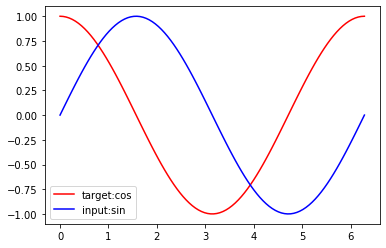

In [28]:
steps = np.linspace(0,np.pi*2,100,dtype = np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)
plt.plot(steps,y_np,'r-',label = 'target:cos')
plt.plot(steps,x_np,'b-',label = 'input:sin')
plt.legend(loc = 'best')
plt.show()

In [35]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        self.rnn = nn.RNN(
            1,
            32,
            num_layers = 1,
            batch_first = True,
            
        )
        self.out = torch.nn.Linear(32,1)
        
    def forward(self,x,h_state):
        r_out,h_state = self.rnn(x,h_state)
        outs  =[]
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step,:]))
        return torch.stack(outs,dim = 1), h_state

In [36]:
rnn = RNN()
print(rnn)


RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [37]:
optimizer= torch.optim.Adam(rnn.parameters(),lr = LR)
loss_func = nn.MSELoss()

In [38]:
h_state= None
plt.figure(1, figsize=(12, 5))
plt.ion()


<Figure size 864x360 with 0 Axes>

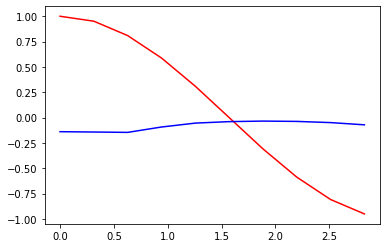

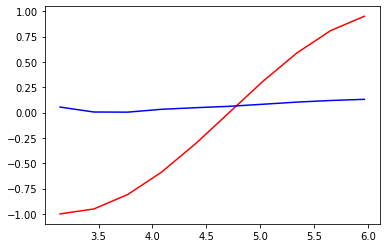

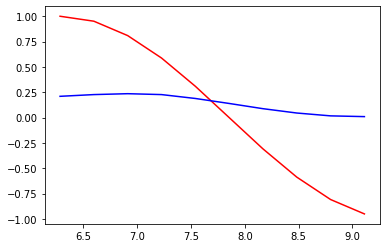

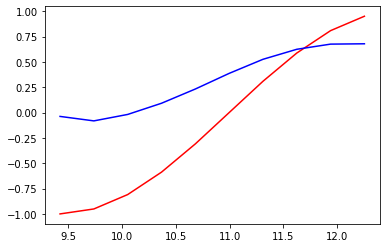

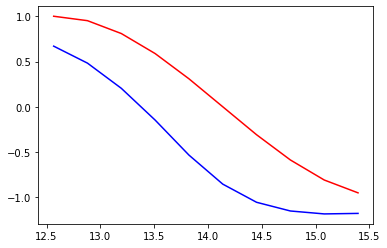

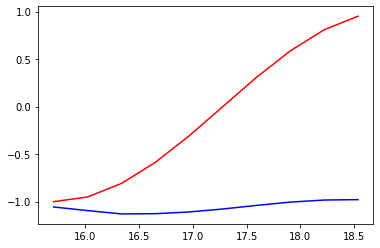

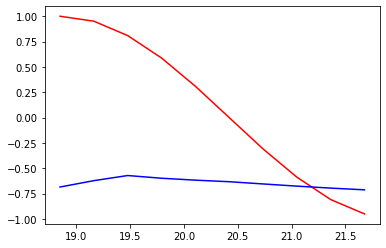

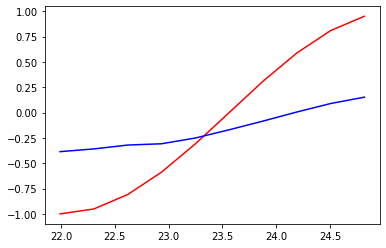

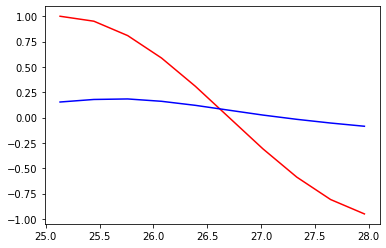

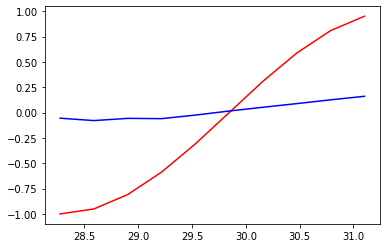

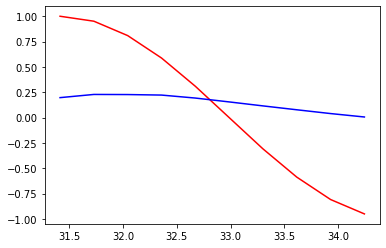

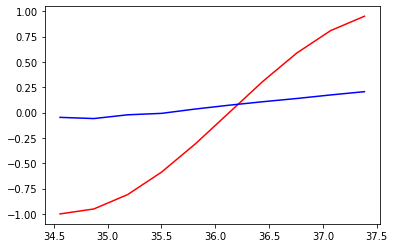

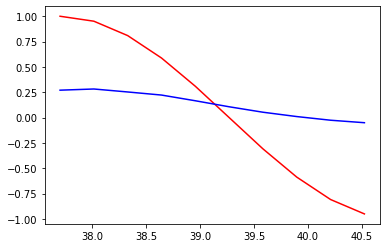

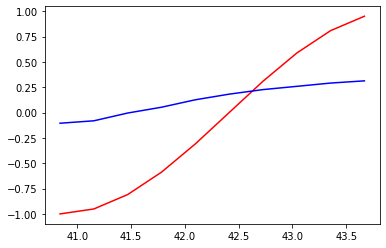

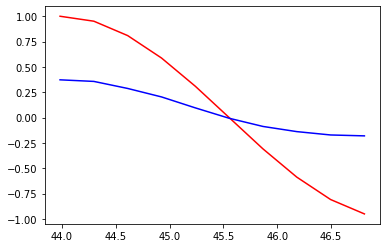

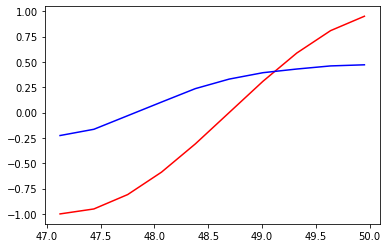

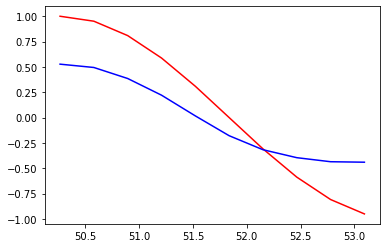

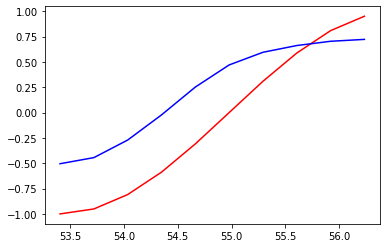

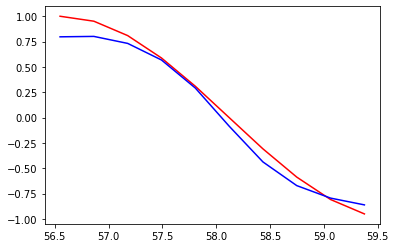

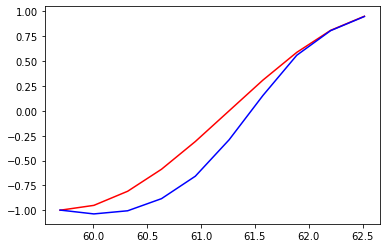

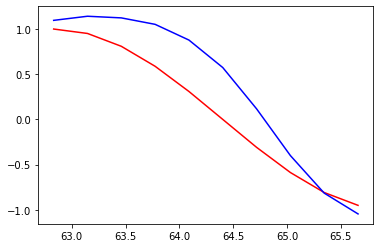

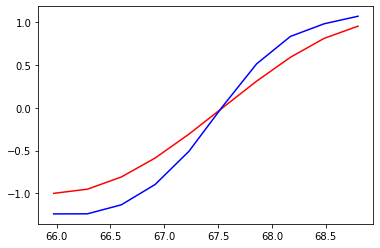

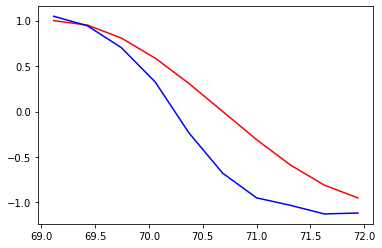

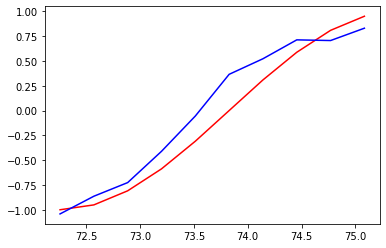

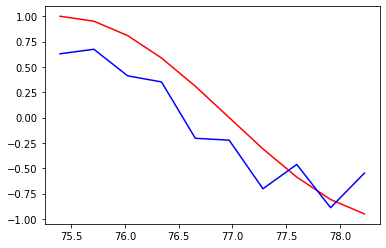

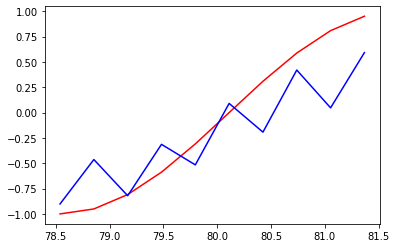

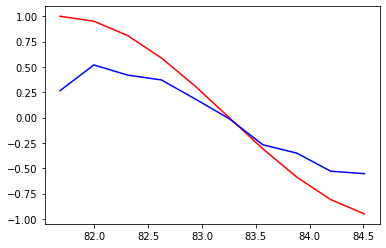

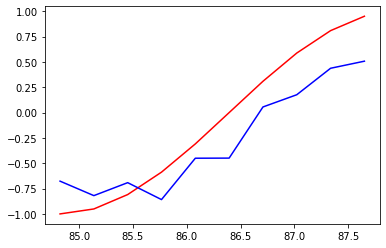

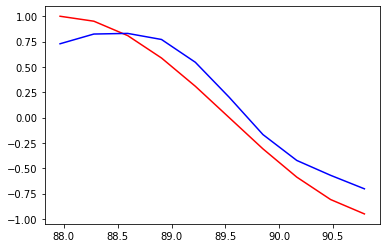

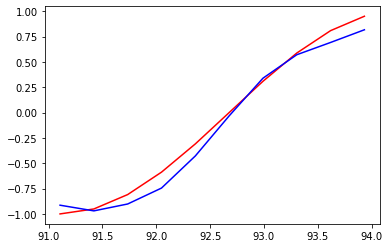

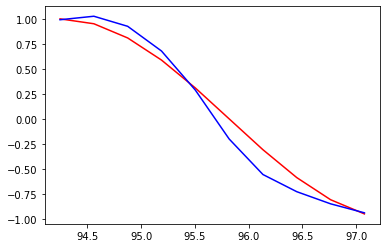

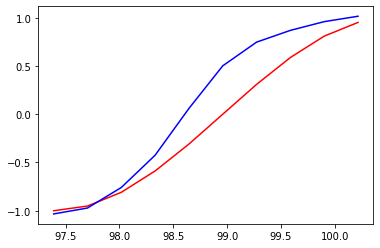

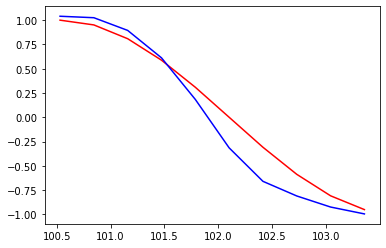

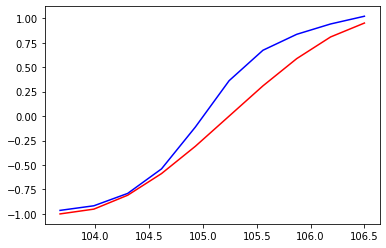

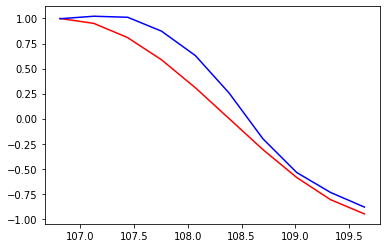

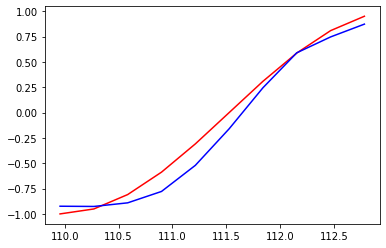

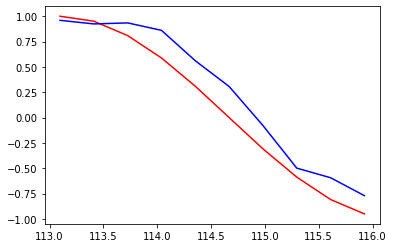

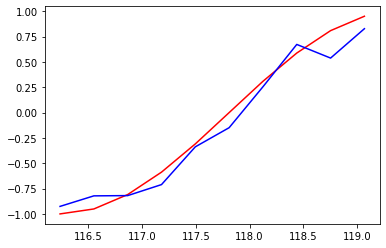

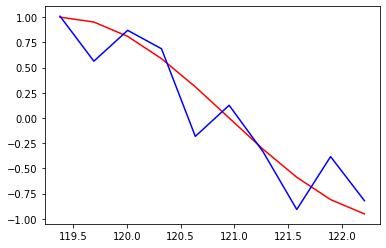

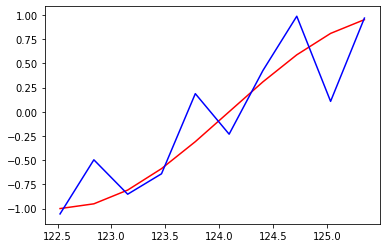

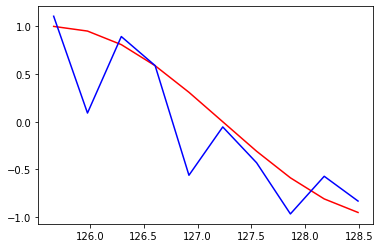

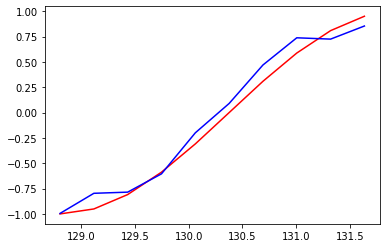

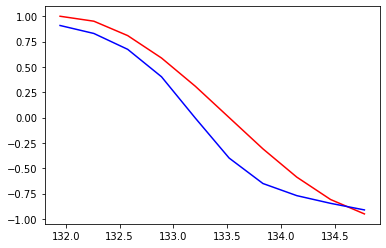

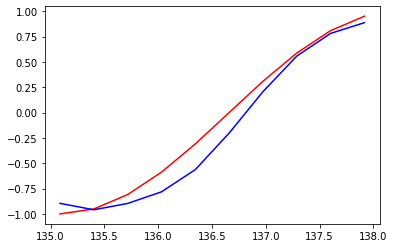

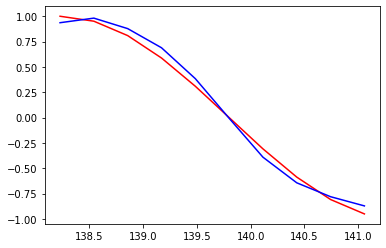

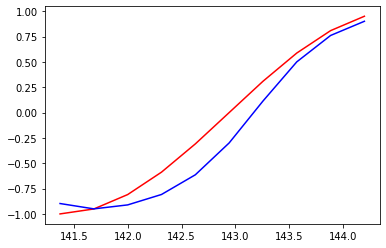

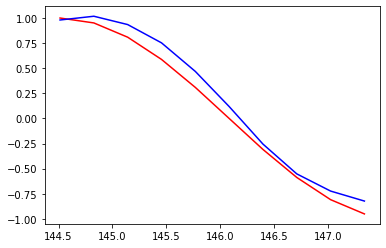

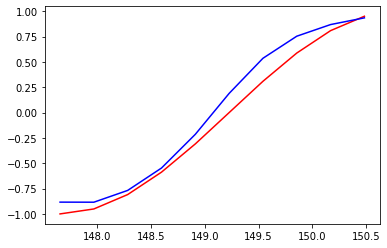

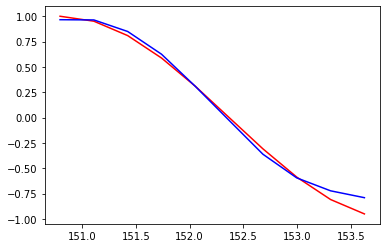

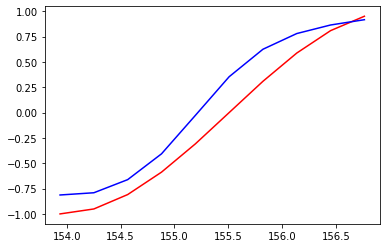

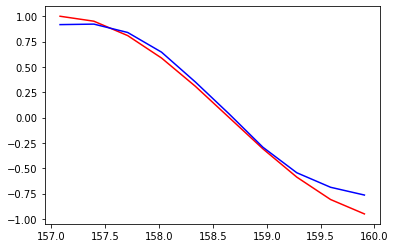

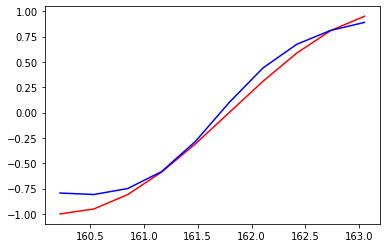

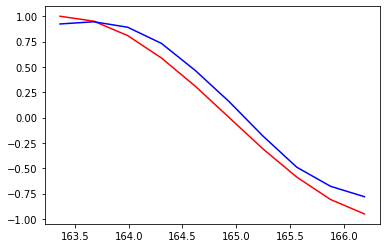

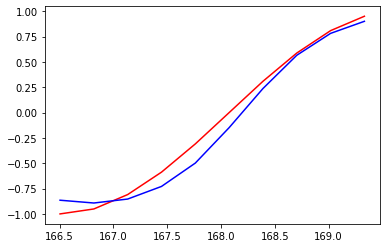

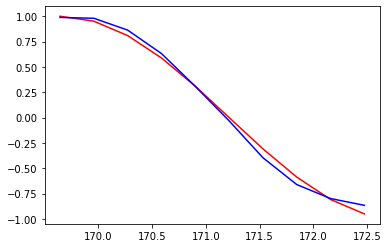

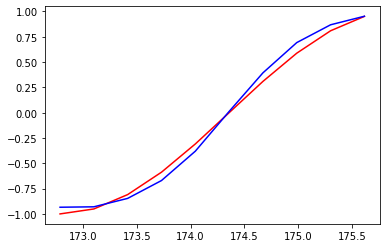

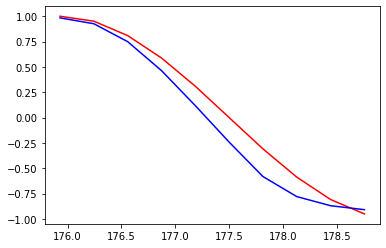

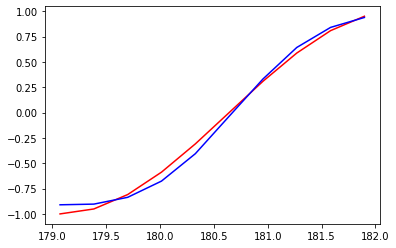

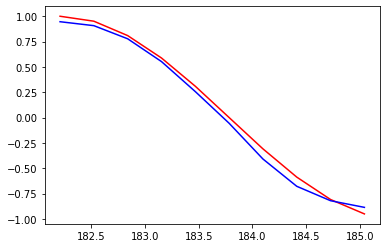

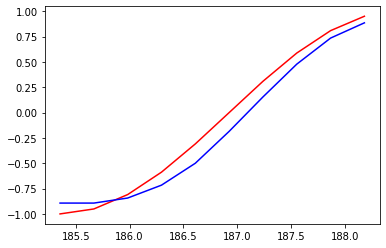

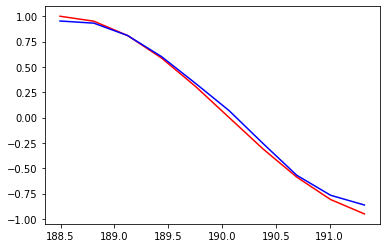

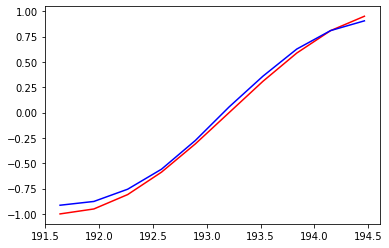

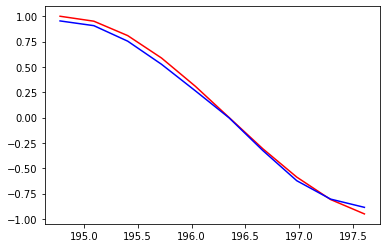

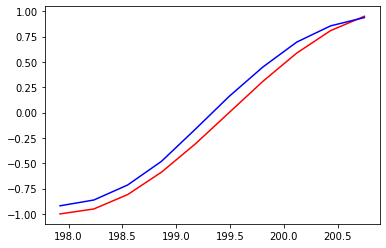

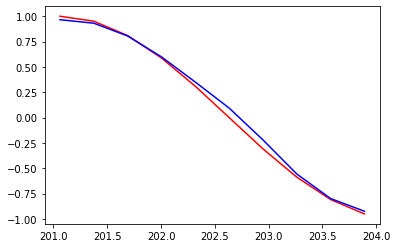

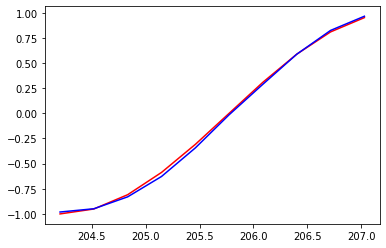

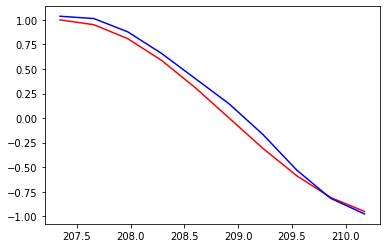

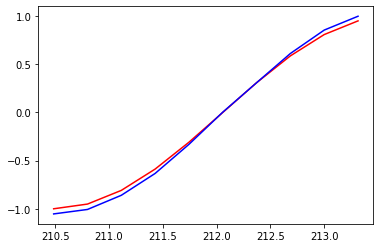

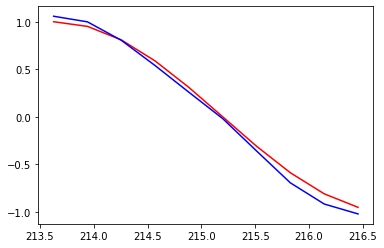

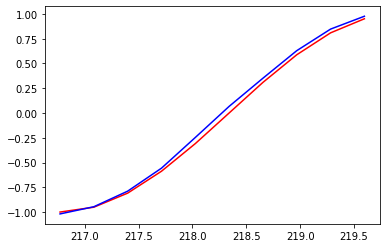

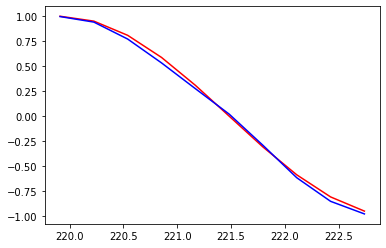

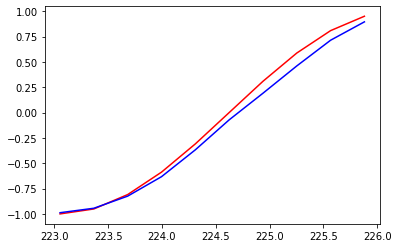

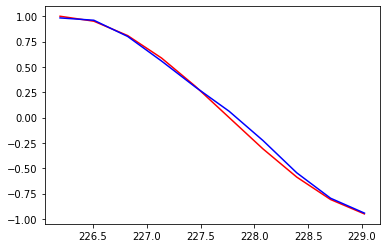

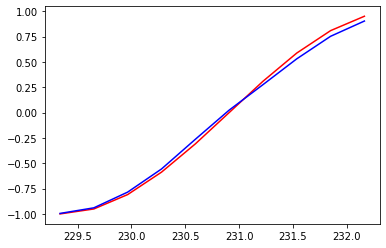

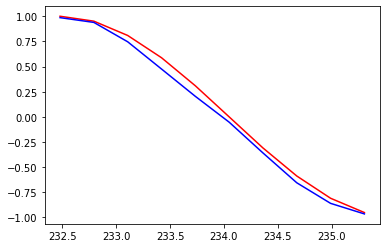

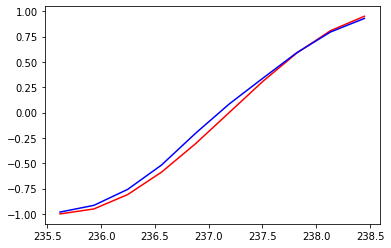

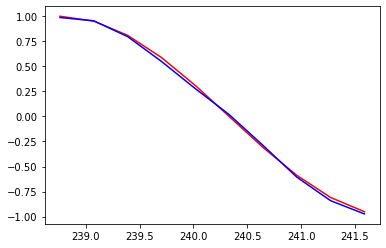

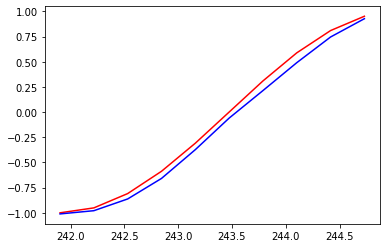

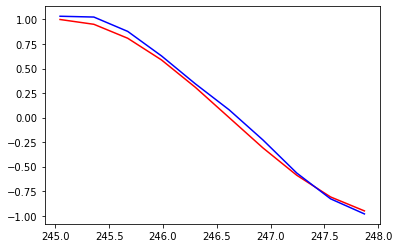

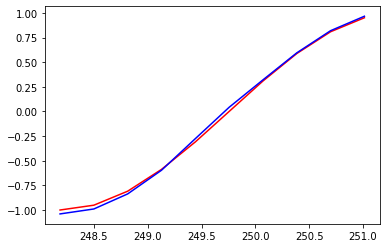

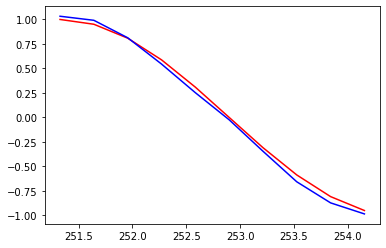

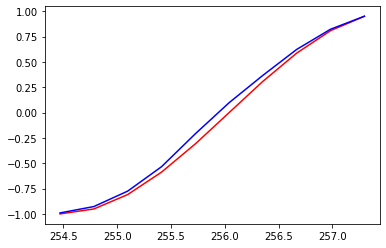

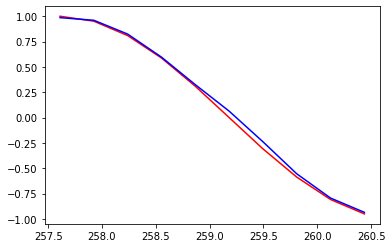

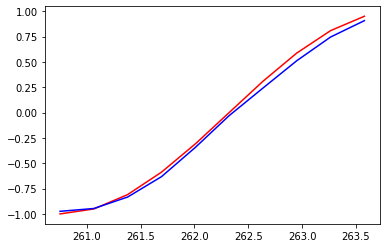

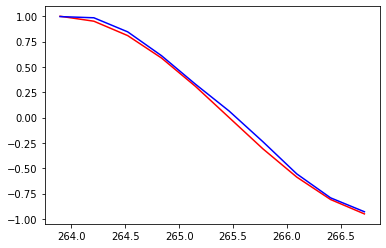

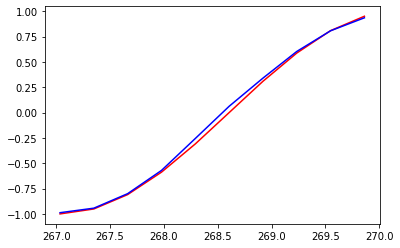

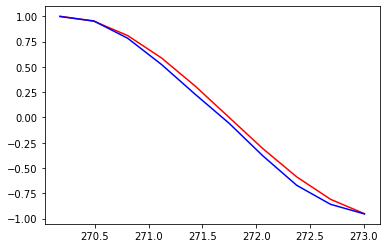

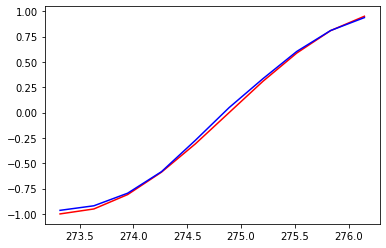

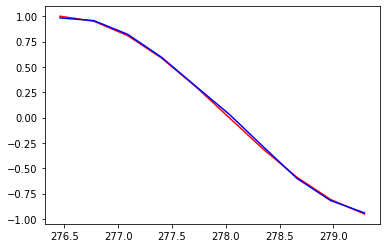

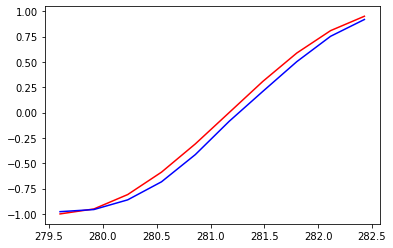

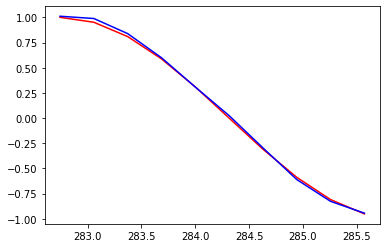

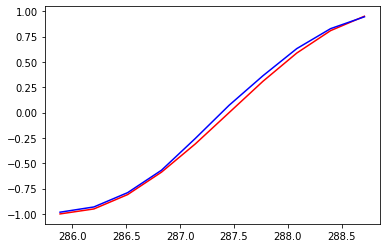

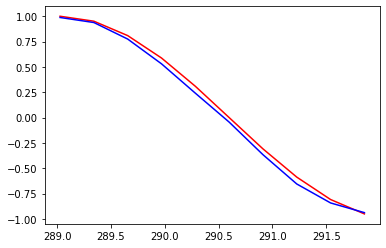

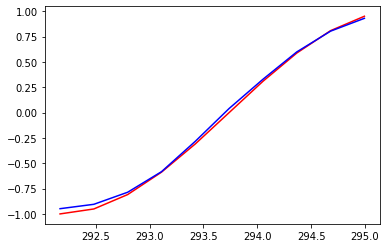

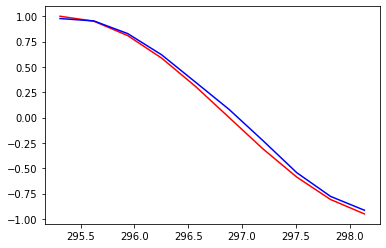

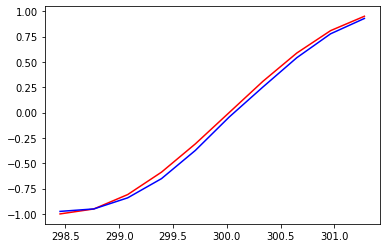

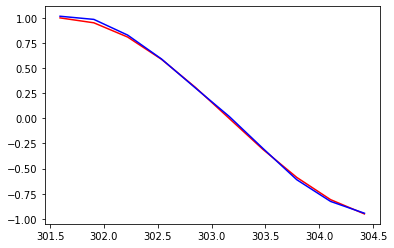

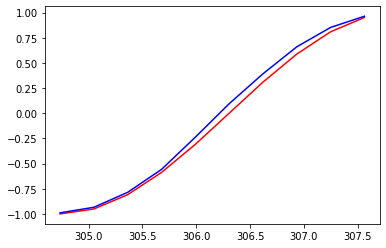

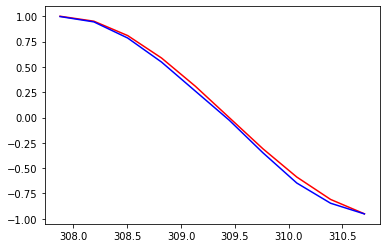

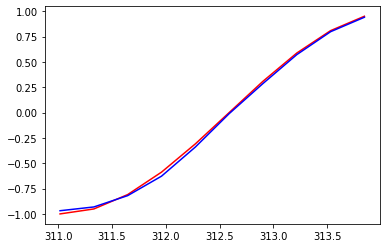

In [39]:
for step in range(100):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32, endpoint=False)  # float32 for converting torch FloatTensor
    x_np = np.sin(steps)
    y_np = np.cos(steps)

    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])

    prediction, h_state = rnn(x, h_state)   # rnn output
    # !! next step is important !!
    h_state = h_state.data        # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # calculate loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()